In [1]:
#pip install opencv-python matplotlib

In [2]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# We need to remove dodgy image

In [6]:
import cv2 
import imghdr

In [7]:
data_dir = 'data'

In [8]:
os.listdir(data_dir)

['Indiagate', 'QutubMinar', 'Raigadh', 'TajMahal']

In [9]:
image_exts = ['jpeg','jpg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir): #navigate in data folder
    for image in os.listdir(os.path.join(data_dir, image_class)):#navigate in sub folder of data
        image_path = os.path.join(data_dir, image_class, image)#image get classified as sad or happy
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data', labels='inferred', label_mode='int', class_names=['Indiagate', 'QutubMinar', 'Raigadh', 'TajMahal'], image_size=(256, 256), batch_size=32)
data = data.map(lambda x, y: (x / 255, y))  # Normalize data

Found 809 files belonging to 4 classes.


In [13]:
#data_iterator = data.as_numpy_iterator()

In [14]:
#batch = data_iterator.next()

In [15]:
#fig, ax = plt.subplots(ncols=10, figsize=(20,20))
#for idx, img in enumerate(batch[0][:10]):
 #   ax[idx].imshow(img.astype(int))
  #  ax[idx].title.set_text(batch[1][idx])

# Pre-processing of the data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.7919118 , 0.7017157 , 0.43504903],
          [0.7875    , 0.69730395, 0.43063724],
          [0.7855392 , 0.69534314, 0.42867646],
          ...,
          [0.8953431 , 0.8247549 , 0.53161764],
          [0.9004902 , 0.82990193, 0.53186274],
          [0.9166667 , 0.8497549 , 0.5443627 ]],
 
         [[0.7943589 , 0.70198756, 0.43097043],
          [0.79484147, 0.7024701 , 0.43145296],
          [0.79641545, 0.7040441 , 0.43302697],
          ...,
          [0.89017695, 0.8195887 , 0.52645147],
          [0.89396447, 0.82337624, 0.525337  ],
          [0.90606236, 0.8391506 , 0.5337584 ]],
 
         [[0.80036765, 0.7032169 , 0.42769608],
          [0.8047794 , 0.70762867, 0.43210784],
          [0.80950713, 0.7123564 , 0.43683556],
          ...,
          [0.8883674 , 0.8177792 , 0.52464193],
          [0.8891046 , 0.8185164 , 0.5204772 ],
          [0.8966012 , 0.82968944, 0.52429724]],
 
         ...,
 
         [[0.9216835 , 0.66678154, 0.43933058],
          [0.85133

# Split Data

In [18]:
len(data)

26

In [41]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1

In [42]:
train_size+val_size+test_size

26

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Model

In [44]:
# from tensorflow.keras.models import Sequential #to build Sequential neural network model.
# from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense ,Flatten ,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [45]:
model =  Sequential() 

In [46]:
# # Modify your model architecture to include dropout layers
# model = Sequential()
# model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))  # Add dropout layer
# model.add(Conv2D(32, (3, 3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))  # Add dropout layer
# model.add(Conv2D(16, (3, 3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))  # Add dropout layer
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))  # Add dropout layer
# model.add(Dense(3, activation='softmax'))  # Change to 3 units and softmax activation

# # Implement a learning rate schedule
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=1000,
#     decay_rate=0.9
# )
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# # Compile the model
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modify your model architecture to include dropout layers
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes (0, 1, 2, 3)

# Learning Rate Schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
#model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
##model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 62, 62, 32)       

# Train

In [52]:
logdir='logs'

Found 809 files belonging to 4 classes.
Epoch 1/20
18/18 [==============================] - 38s 2s/step - loss: 1.5649 - accuracy: 0.2500 - val_loss: 1.3861 - val_accuracy: 0.2812
Epoch 2/20
18/18 [==============================] - 31s 2s/step - loss: 1.3855 - accuracy: 0.2622 - val_loss: 1.3863 - val_accuracy: 0.2438
Epoch 3/20
18/18 [==============================] - 30s 2s/step - loss: 1.3674 - accuracy: 0.3368 - val_loss: 1.3456 - val_accuracy: 0.4563
Epoch 4/20
18/18 [==============================] - 31s 2s/step - loss: 1.2614 - accuracy: 0.4774 - val_loss: 1.2162 - val_accuracy: 0.4750
Epoch 5/20
18/18 [==============================] - 31s 2s/step - loss: 1.1720 - accuracy: 0.5278 - val_loss: 1.2928 - val_accuracy: 0.4375
Epoch 6/20
18/18 [==============================] - 30s 2s/step - loss: 1.0999 - accuracy: 0.5312 - val_loss: 1.1808 - val_accuracy: 0.5312
Epoch 7/20
18/18 [==============================] - 30s 2s/step - loss: 1.0394 - accuracy: 0.5885 - val_loss: 1.0216 - v

In [50]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [51]:
#hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sshan\AppData\Local\Temp\ipykernel_24840\2029832520.py", line 1, in <module>
      hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\losses.py", line 2354, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\src\backend.py", line 5762, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 3 which is outside the valid range of [0, 3).  Label values: 0 0 0 3 2 2 3 0 2 0 0 1 0 1 2 0 0 0 2 2 2 3 1 3 3 0 1 3 1 0 0 3
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_5089]

In [53]:
hist.history

{'loss': [1.56489896774292,
  1.3854804039001465,
  1.3673605918884277,
  1.2613675594329834,
  1.172048807144165,
  1.0999119281768799,
  1.0394185781478882,
  0.9496310353279114,
  0.8897364735603333,
  0.8258092403411865,
  0.7015864849090576,
  0.6837263107299805,
  0.5346453189849854,
  0.46859708428382874,
  0.4459320306777954,
  0.4035559892654419,
  0.31776490807533264,
  0.3167826533317566,
  0.283385694026947,
  0.20874899625778198],
 'accuracy': [0.25,
  0.2621527910232544,
  0.3368055522441864,
  0.4774305522441864,
  0.5277777910232544,
  0.53125,
  0.5885416865348816,
  0.6371527910232544,
  0.6354166865348816,
  0.6996527910232544,
  0.7309027910232544,
  0.7309027910232544,
  0.8020833134651184,
  0.8211805820465088,
  0.8333333134651184,
  0.8472222089767456,
  0.8871527910232544,
  0.8940972089767456,
  0.8871527910232544,
  0.9340277910232544],
 'val_loss': [1.3860547542572021,
  1.3862909078598022,
  1.3456435203552246,
  1.216213583946228,
  1.292799711227417,
  1.

# Plot performance

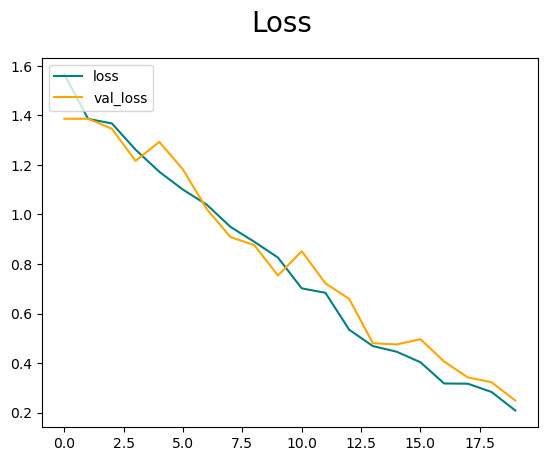

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

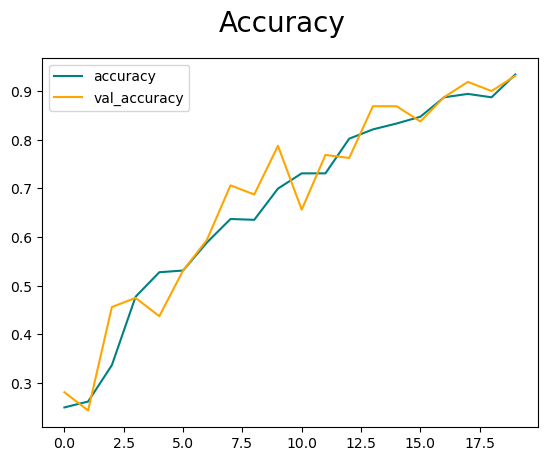

In [55]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [57]:
pre = Precision()  #Precision is a metric that measures the proportion of true positive predictions
re = Recall() #measures the proportion of true positive predictions out of all actual positive cases.
acc = BinaryAccuracy() #Binary accuracy is a metric that measures the accuracy of binary classification models.

In [58]:
#for batch in test.as_numpy_iterator(): 
 #   X, y = batch
  #  yhat = model.predict(X)
   # pre.update_state(y, yhat)
    #re.update_state(y, yhat)
    #acc.update_state(y, yhat)
from tensorflow.keras.metrics import CategoricalAccuracy

# Create the CategoricalAccuracy metric
cat_acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    cat_acc.update_state(tf.one_hot(y, depth=3), yhat)  # one-hot encode y for three classes

print(cat_acc.result())


1/1 [==============================] - 0s 335ms/step
tf.Tensor(0.69863015, shape=(), dtype=float32)


In [59]:
print(f'Precision:{pre.result().numpy()},Recall:{ re.result().numpy()},Accuracy:{ acc.result().numpy()}')

Precision:0.0,Recall:0.0,Accuracy:0.0


# Test

In [60]:
import cv2

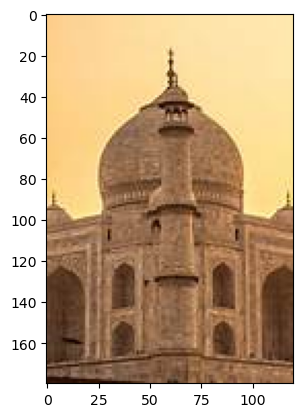

In [95]:
img = cv2.imread('data/TajMahal/th15.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

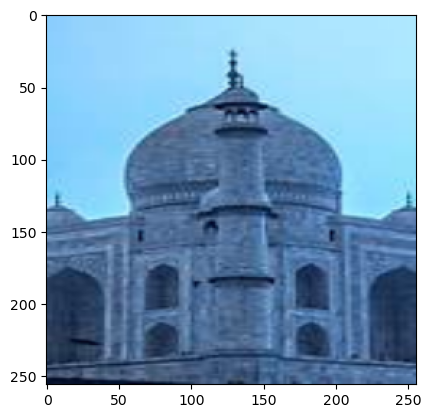

In [96]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [97]:
#yhat = model.predict(np.expand_dims(resize/255, 0))

yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 58ms/step


In [98]:
yhat

array([[0.18614313, 0.40134147, 0.26823488, 0.14428055]], dtype=float32)

In [100]:
if np.argmax(yhat) == 0:
    print(f'Predicted class is India Gate')
elif np.argmax(yhat) == 1:
    print(f'Predicted class is Qutub Minar')
elif np.argmax(yhat) == 2:
    print(f'Predicted class is Raigad')
elif np.argmax(yhat) == 3:
    print(f'Predicted class is Taj Mahal')
else:
    print(f'Unknown class predicted')


Predicted class is Qutub Minar


In [78]:
#if yhat > 0.9: 
 #   print(f'Predicted class is Taj Mahal💕.Taj Mahal, also spelled Tadj Mahall, mausoleum complex in Agra, western Uttar Pradesh state, northern India. The Taj Mahal was built by the Mughal emperor Shah Jahān (reigned 1628–58) to immortalize his wife Mumtaz Mahal (“Chosen One of the Palace”), who died in childbirth in 1631, having been the emperor’s inseparable companion since their marriage in 1612. India’s most famous and widely recognized building, it is situated in the eastern part of the city on the southern (right) bank of the Yamuna (Jumna) River. Agra Fort (Red Fort), also on the right bank of the Yamuna, is about 1 mile (1.6 km) west of the Taj Mahal.')
#else:
 #   print(f'Predicted class is Raigadh🙇‍♂️🙇‍.Raigad is beautifully located fort in Raigad district of Maharashtra, India. It was strategically built high enough to protect it from enemies. Raigad was previously known as “Rairi fort.Valiant Maratha King Chhatrapati Shivaji Maharaj captured Rairi fort from Chandra Rao More and renamed it as Raigad.')
